In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phylake1337/fire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fire-dataset


In [2]:
!apt-get update && apt-get install -y libvips libvips-dev


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,229 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,647 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [45.2 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,604 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:13 http://security

In [3]:
!ldconfig -p | grep libvips

!pip install pyvips


	libvips.so.42 (libc6,x86-64) => /lib/x86_64-linux-gnu/libvips.so.42
	libvips.so (libc6,x86-64) => /lib/x86_64-linux-gnu/libvips.so
	libvips-cpp.so.42 (libc6,x86-64) => /lib/x86_64-linux-gnu/libvips-cpp.so.42
	libvips-cpp.so (libc6,x86-64) => /lib/x86_64-linux-gnu/libvips-cpp.so
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pkgconfig-1.5.5-py3-none-any.whl.metadata (4.0 kB)
Using cached pkgconfig-1.5.5-py3-none-any.whl (6.7 kB)
  Created wheel for pyvips: filename=pyvips-2.2.3-cp310-cp310-linux_x86_64.whl size=150861 sha256=01af9e9ede05a2dd54337b9441af535a8ffb9b49e89ec1394ad99a40ac06d793
  Stored in directory: /root/.cache/pip/wheels/f5/47/cf/3fcf9182520805b4fff954b70d101c61aa6f2a4fe43d1889a3
Successfully built pyvips


## Evaluation of VLMs
# <img src="evaluation.png" width="500"/>



## Dataset Analysis


In [4]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm 

# Dataset Analysis
def analyze_dataset(fire_images_path, non_fire_images_path):
    fire_images = glob.glob(fire_images_path)
    non_fire_images = glob.glob(non_fire_images_path)

    print(f"Number of fire images: {len(fire_images)}")
    print(f"Number of non-fire images: {len(non_fire_images)}")

    return fire_images, non_fire_images

def visualize_samples(image_paths, title, num_samples=5):
    print(f"Displaying {num_samples} sample images for '{title}'...")
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_samples]):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.suptitle(title, y=0.9)  
    plt.tight_layout()        
    plt.show()

# Load and Preprocess Image
def load_image(image_path):
    return Image.open(image_path).convert("RGB") 

In [5]:
# Define dataset paths
dataset_path = "/kaggle/input/fire-dataset/fire_dataset"
fire_images_path = os.path.join(dataset_path, "fire_images", "*.png")
non_fire_images_path = os.path.join(dataset_path, "non_fire_images", "*.png")
# Analyze dataset
fire_images, non_fire_images = analyze_dataset(fire_images_path, non_fire_images_path)


Number of fire images: 755
Number of non-fire images: 244


Displaying 5 sample images for 'Fire Images'...


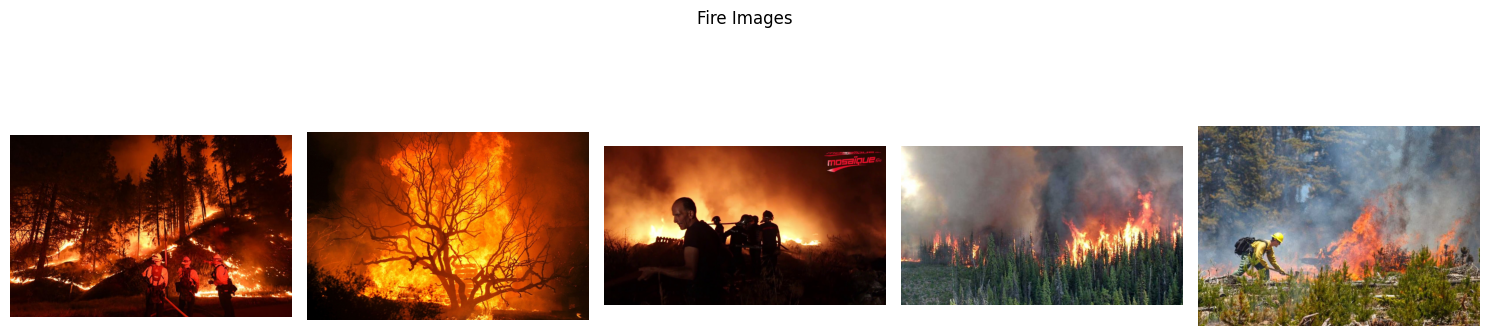

Displaying 5 sample images for 'Non-Fire Images'...


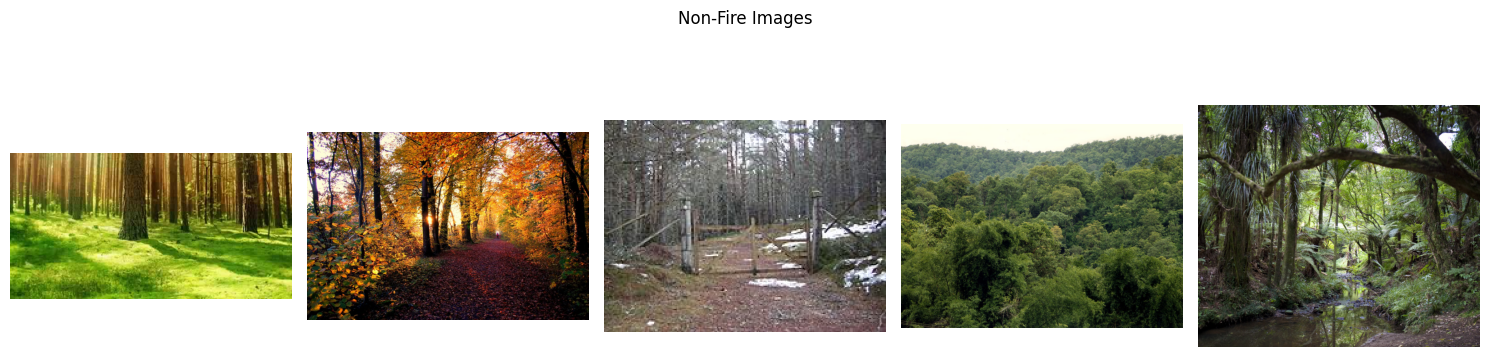

In [6]:
# Visualize sample images
visualize_samples(fire_images, "Fire Images")
visualize_samples(non_fire_images, "Non-Fire Images")


## SmolVLM

In [7]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModel, AutoModelForVision2Seq, AutoModelForCausalLM
from transformers.image_utils import load_image
import os
import glob


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

os.environ["TOKENIZERS_PARALLELISM"] = "false"
model_name = "HuggingFaceTB/SmolVLM-Instruct"

# Initialize processor and model
processor = AutoProcessor.from_pretrained(model_name)
model = AutoModelForVision2Seq.from_pretrained(model_name,
    _attn_implementation="eager",
).to(DEVICE)

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


config.json:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

In [8]:
# Inference Function
def run_inference_on_images_with_labels(image_paths, expected_label, prompt):
    y_true = []  # True labels
    y_pred = []  # Predicted labels
    for image_path in tqdm(image_paths):
        image = load_image(image_path)
        inputs = processor(text=prompt, images=[image], return_tensors="pt").to(DEVICE)
        generated_ids = model.generate(**inputs, max_new_tokens=500)
        generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)
        prediction = generated_texts[0].split("Assistant:")[1].strip().lower()
        
        y_true.append(expected_label)  # 'yes' for fire, 'no' for non-fire
        y_pred.append('yes' if 'yes' in prediction else 'no')
    
    return y_true, y_pred

In [9]:
# Prepare the input prompt for inference
messages = [
    {
    "role": "user",
    "content": [
            {"type": "image"},
            {"type": "text", "text": "You are helpful in identifying fire or smoke in images. Answer in English only and answer in a single word, either 'yes' or 'no'.Do you see fire or smoke in the image?"}
        ]
    },
]
prompt = processor.apply_chat_template(messages, add_generation_prompt=True)

# Run inference and collect predictions
fire_y_true, fire_y_pred = run_inference_on_images_with_labels(fire_images, 'yes', prompt)
non_fire_y_true, non_fire_y_pred = run_inference_on_images_with_labels(non_fire_images, 'no', prompt)

# Combine true and predicted labels
y_true = fire_y_true + non_fire_y_true
y_pred = fire_y_pred + non_fire_y_pred

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["non-fire", "fire"]))

# Calculate and display accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")


100%|██████████| 244/244 [22:28<00:00,  5.53s/it]

Classification Report:
              precision    recall  f1-score   support

    non-fire       1.00      0.95      0.97       244
        fire       0.98      1.00      0.99       755

    accuracy                           0.99       999
   macro avg       0.99      0.98      0.98       999
weighted avg       0.99      0.99      0.99       999

Overall Accuracy: 0.99


## Moondream


In [10]:
import os
import glob
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score

model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    revision="2025-01-09",
    trust_remote_code=True,
    # Uncomment to run on GPU.
    device_map={"": "cuda"}
)



config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

hf_moondream.py:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

vision.py:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

image_crops.py:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

config.py:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

layers.py:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

region.py:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

weights.py:   0%|          | 0.00/9.71k [00:00<?, ?B/s]

text.py:   0%|          | 0.00/5.31k [00:00<?, ?B/s]

rope.py:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

utils.py:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

moondream.py:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

In [11]:
def load_image(image_path):
    return Image.open(image_path)

# Function to run inference on images and return true and predicted labels
def run_inference_on_images_with_labels(image_paths, expected_label, model):
    y_true = []  
    y_pred = []  

    for image_path in tqdm(image_paths):
        image = load_image(image_path)
        
        try:
            # Encode image and query model
            enc_image = model.encode_image(image)
            prediction_text = model.query(enc_image, "You are helpful in identifying fire or smoke in images. Answer in English only and answer in a single word, either 'yes' or 'no'.Do you see fire or smoke in the image?")['answer'].lower()
            
            # Append true and predicted labels
            y_true.append(expected_label)
            y_pred.append('yes' if 'yes' in prediction_text else 'no')
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            continue

    return y_true, y_pred



In [12]:
# Run inference for fire and non-fire images
fire_y_true, fire_y_pred = run_inference_on_images_with_labels(fire_images, 'yes', model)
non_fire_y_true, non_fire_y_pred = run_inference_on_images_with_labels(non_fire_images, 'no', model)

# Combine all true and predicted labels
y_true = fire_y_true + non_fire_y_true
y_pred = fire_y_pred + non_fire_y_pred

# Calculate and print performance metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["non-fire", "fire"]))

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

100%|██████████| 244/244 [02:44<00:00,  1.48it/s]

Classification Report:
              precision    recall  f1-score   support

    non-fire       1.00      0.97      0.98       244
        fire       0.99      1.00      0.99       755

    accuracy                           0.99       999
   macro avg       0.99      0.98      0.99       999
weighted avg       0.99      0.99      0.99       999

Overall Accuracy: 0.99
